# CV S6: Texture Analysis Notebook

This notebook demonstrates several classical texture analysis methods and reviews the intuition behind each one.

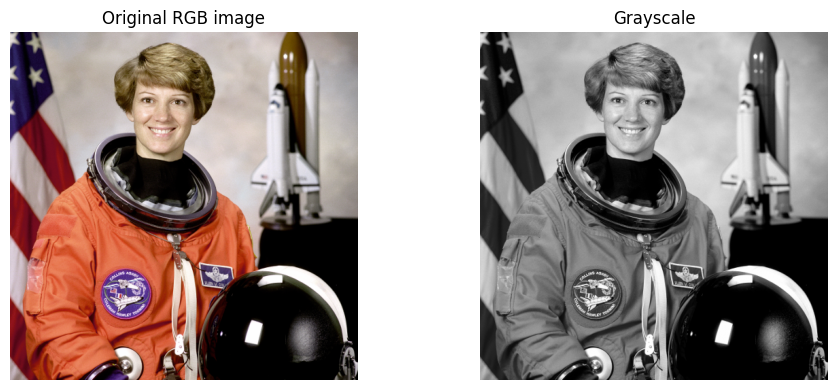

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, img_as_float
from skimage.feature import local_binary_pattern
from skimage.filters import rank, gabor
from skimage.morphology import disk
from scipy.ndimage import uniform_filter
from scipy import ndimage as ndi
import pywt

# Load and normalize a sample image
image_rgb = data.astronaut()
gray = img_as_float(color.rgb2gray(image_rgb))

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(image_rgb)
axes[0].set_title('Original RGB image')
axes[0].axis('off')
axes[1].imshow(gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')
plt.tight_layout()
plt.show()


## Local Binary Pattern (LBP)

LBP thresholds each pixel against its neighbors to build a binary code that summarizes local micro-patterns. It is robust to monotonic illumination changes and widely used for texture classification.

/home/alirje/ComputerVisionFall404/.venv/lib/python3.13/site-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


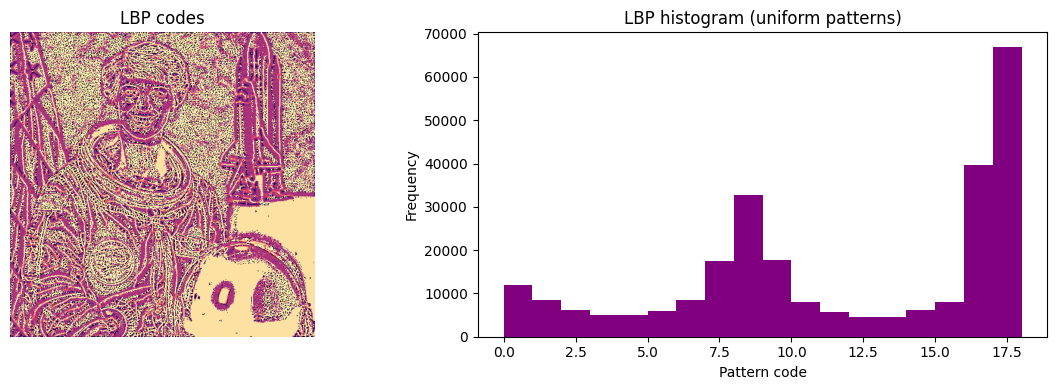

In [6]:
radius = 2
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(lbp, cmap='magma')
axes[0].set_title('LBP codes')
axes[0].axis('off')
axes[1].hist(lbp.ravel(), bins=np.arange(0, n_points + 3), color='purple')
axes[1].set_title('LBP histogram (uniform patterns)')
axes[1].set_xlabel('Pattern code')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Local Standard Deviation (LSD)

Local standard deviation measures the contrast within a neighborhood, highlighting areas with high variability. It is effective for detecting texture roughness and edges.

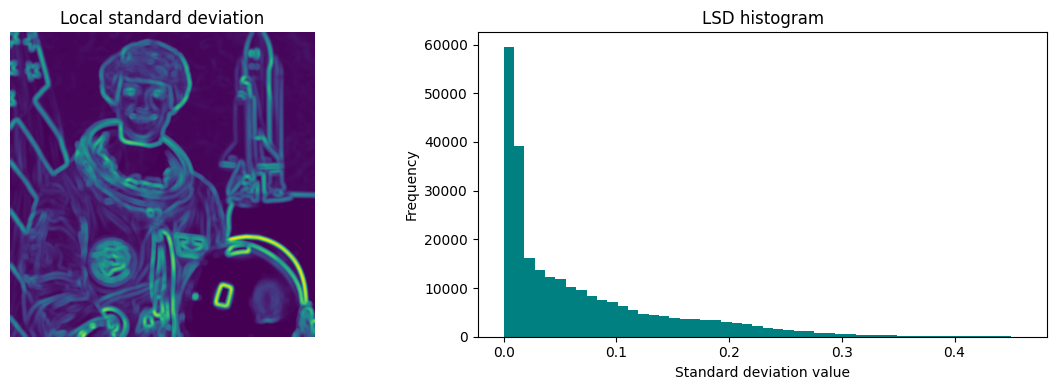

In [7]:
# Rank filters expect uint8 input
gray_uint = (gray * 255).astype(np.uint8)
std_radius = 5
footprint = disk(std_radius)
lsd = ndi.generic_filter(gray, np.std, footprint=footprint)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(lsd, cmap='viridis')
axes[0].set_title('Local standard deviation')
axes[0].axis('off')
axes[1].hist(lsd.ravel(), bins=50, color='teal')
axes[1].set_title('LSD histogram')
axes[1].set_xlabel('Standard deviation value')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Entropy Filtering

Local entropy quantifies randomness by examining the distribution of intensities in a neighborhood. Textured regions with diverse values produce higher entropy than flat regions.

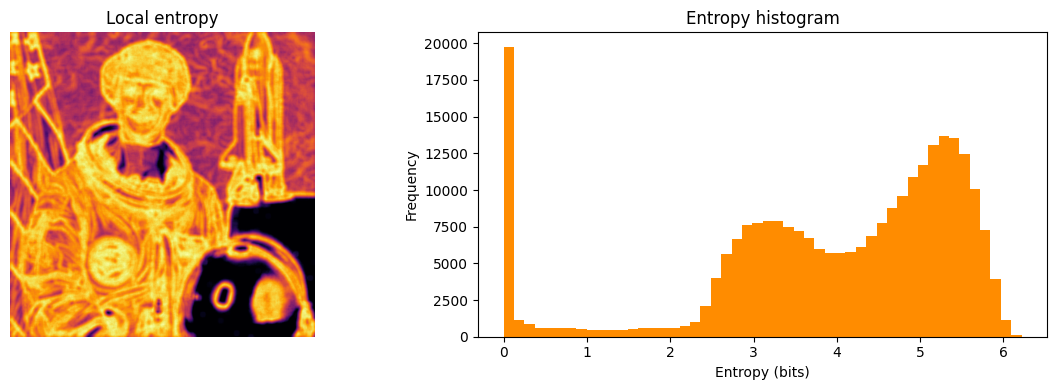

In [8]:
entropy_radius = 5
entropy_img = rank.entropy(gray_uint, disk(entropy_radius))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
im = axes[0].imshow(entropy_img, cmap='inferno')
axes[0].set_title('Local entropy')
axes[0].axis('off')
axes[1].hist(entropy_img.ravel(), bins=50, color='darkorange')
axes[1].set_title('Entropy histogram')
axes[1].set_xlabel('Entropy (bits)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Wavelet Texture Analysis

Wavelet transforms decompose an image into frequency subbands at multiple scales. Detail coefficients capture directional textures while approximation coefficients represent coarse structure.

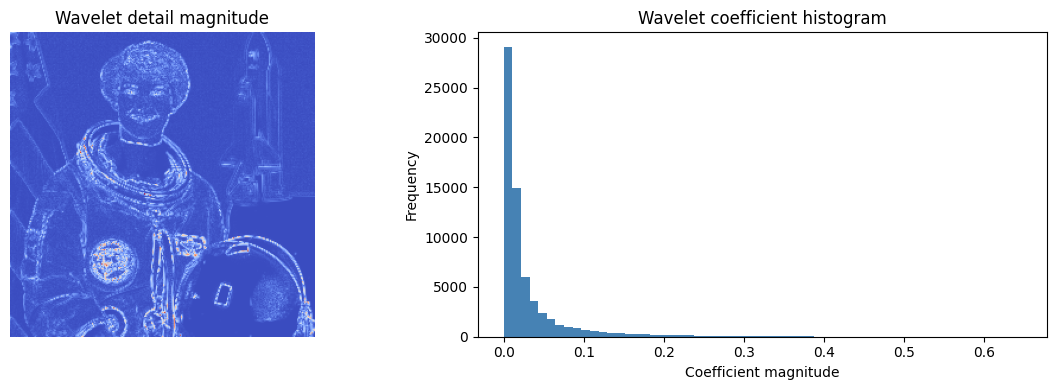

In [9]:
coeffs2 = pywt.dwt2(gray, 'db2')
cA, (cH, cV, cD) = coeffs2
detail_energy = np.sqrt(cH**2 + cV**2 + cD**2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(detail_energy, cmap='coolwarm')
axes[0].set_title('Wavelet detail magnitude')
axes[0].axis('off')
axes[1].hist(detail_energy.ravel(), bins=60, color='steelblue')
axes[1].set_title('Wavelet coefficient histogram')
axes[1].set_xlabel('Coefficient magnitude')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Gabor Filtering

Gabor filters are oriented band-pass filters that respond strongly to textures with matching frequency and orientation. They mimic receptive fields in the visual cortex and are effective for texture segmentation.

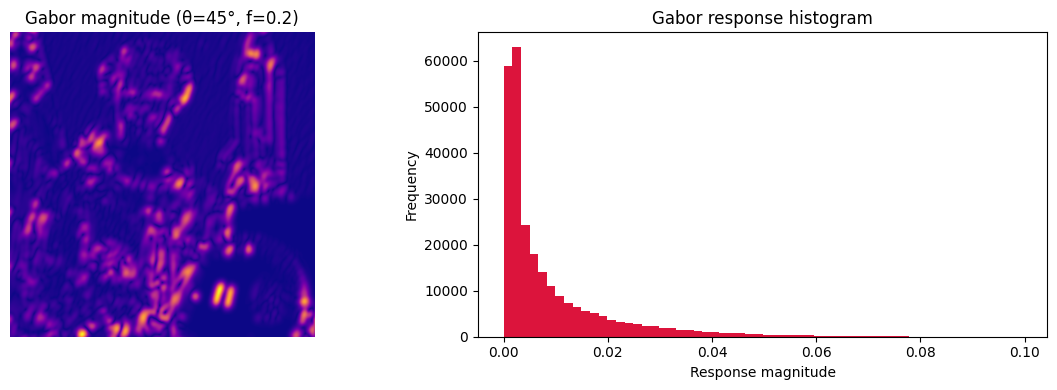

In [ ]:
frequency = 0.2
gabor_real, gabor_imag = gabor(gray, frequency=frequency, theta=np.pi/4)
gabor_magnitude = np.sqrt(gabor_real**2 + gabor_imag**2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].imshow(gabor_magnitude, cmap='plasma')
axes[0].set_title('Gabor magnitude (θ=45°, f=0.2)')
axes[0].axis('off')
axes[1].hist(gabor_magnitude.ravel(), bins=60, color='crimson')
axes[1].set_title('Gabor response histogram')
axes[1].set_xlabel('Response magnitude')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


## Weber Contrast Map

Weber contrast describes intensity changes relative to local mean brightness: $C = (I - \mu)/\mu$. It emphasizes relative changes and is less sensitive to absolute illumination.

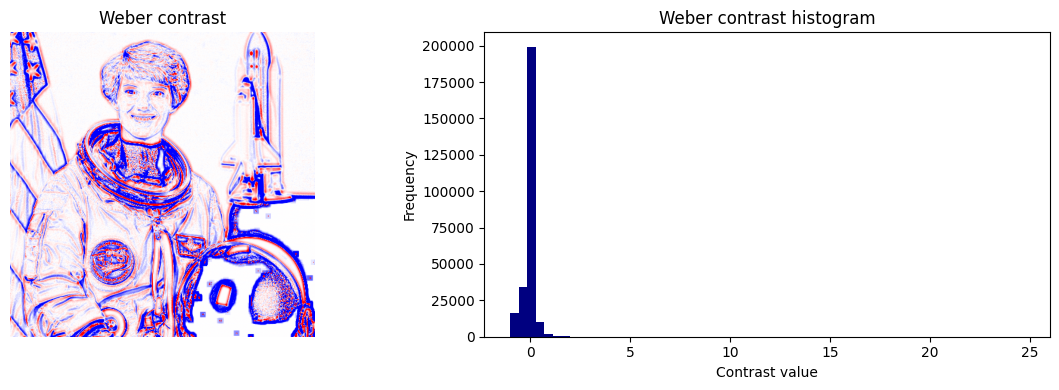

In [11]:
window = 9
local_mean = uniform_filter(gray, size=window)
weber = (gray - local_mean) / (local_mean + 1e-3)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
im = axes[0].imshow(weber, cmap='bwr', vmin=-0.5, vmax=0.5)
axes[0].set_title('Weber contrast')
axes[0].axis('off')
axes[1].hist(weber.ravel(), bins=60, color='navy')
axes[1].set_title('Weber contrast histogram')
axes[1].set_xlabel('Contrast value')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
